In [1]:
#Import Python libraries

from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get Stock Symbols
#FAANG
assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [3]:
#Assign weights to portfolio
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [4]:
#Get the stock/portfolio starting date
stockStartDate = '2013-01-01'

In [5]:
#Get the stock/portfolio ending date
today = datetime.today().strftime('%Y-%m-%d')
today

'2021-09-05'

In [6]:
#Create a dataframe to store adjusted close price of the stocks
df = pd.DataFrame()

In [11]:
#Store the adjusted close price of the stock into the df
for stock in assets:
    df[stock] = web.DataReader(stock,data_source = 'yahoo', start = stockStartDate, end = today)['Adj Close']
    
#Show the df
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,16.985447,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.771053,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.303900,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.207998,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.251616,13.880000,365.280823
...,...,...,...,...,...
2021-08-30,380.660004,3421.570068,153.119995,566.179993,2909.389893
2021-08-31,379.380005,3470.790039,151.830002,569.190002,2909.239990
2021-09-01,382.049988,3479.000000,152.509995,582.070007,2916.840088


,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,16.985447,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.771053,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.303900,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.207998,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.251616,13.880000,365.280823
...,...,...,...,...,...
2021-08-30,380.660004,3421.570068,153.119995,566.179993,2909.389893
2021-08-31,379.380005,3470.790039,151.830002,569.190002,2909.239990
2021-09-01,382.049988,3479.000000,152.509995,582.070007,2916.840088


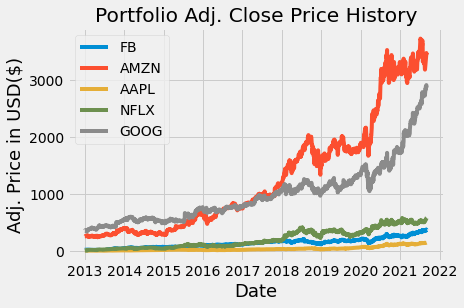

In [10]:
#Visually show the stock/portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)

plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price in USD($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()

In [12]:
#Show the daily simple return
returns = df. pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2021-08-30,0.021550,0.021477,0.030417,0.012989,0.006358
2021-08-31,-0.003363,0.014385,-0.008425,0.005316,-0.000052
2021-09-01,0.007038,0.002365,0.004479,0.022629,0.002612


In [13]:
#Create and show the annualized covariance matrix
#252 is number of trading days
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual


,FB,AMZN,AAPL,NFLX,GOOG
FB,0.115974,0.053799,0.044521,0.055631,0.049818
AMZN,0.053799,0.091394,0.039620,0.061679,0.046572
AAPL,0.044521,0.039620,0.080506,0.035338,0.038150
NFLX,0.055631,0.061679,0.035338,0.203415,0.047884
GOOG,0.049818,0.046572,0.038150,0.047884,0.065310


In [14]:
#Calculate the portfolio variance
#Weights transposed x covariance matrix x weights
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.060104845533330765

In [15]:
#Calculate portfolio volatility (standard dev)
port_volatility = np.sqrt(port_variance)
port_volatility

0.2451628959147994

In [16]:
#Calculate annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn


0.36181052926019897

In [17]:
#Show the expected annual return, volatility, and variance
percent_var = str(round(port_variance,2) * 100) + '%'
percent_vols = str(round(port_volatility,2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected Annual Return: ' + percent_ret)
print('Annual Volatility: ' + percent_vols)
print('Annual Variance: ' + percent_var)

Expected Annual Return: 36.0%
Annual Volatility: 25.0%
Annual Variance: 6.0%


In [25]:
#Import portfolio optimization tools
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

#Calculate expected returns and the annualized sample covariance matrix of asset returns

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

#Optimize for max sharpe ratio
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
print("-"*120)
ef.portfolio_performance(verbose = True)


OrderedDict([('FB', 0.14193), ('AMZN', 0.22765), ('AAPL', 0.26183), ('NFLX', 0.31352), ('GOOG', 0.05508)])
------------------------------------------------------------------------------------------------------------------------
Expected annual return: 39.3%
Annual volatility: 26.2%
Sharpe Ratio: 1.43


(0.39310310496884115, 0.2618202001436307, 1.4250355960470669)

In [31]:
#Check Sum
sumFAANG = 0.14193 + 0.22765 + 0.26183 + 0.31352 + 0.05508
print(sumFAANG)
print("-"*100)

#Get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights_ = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value= 15000)
allocation, leftover = da.lp_portfolio()
print('Discrete Allocation:', allocation)
print('Funds Remaining: ${:.2f}'.format(leftover))

1.00001
----------------------------------------------------------------------------------------------------
Discrete Allocation: {'FB': 7, 'AMZN': 1, 'AAPL': 26, 'NFLX': 8}
Funds Remaining: $152.09
